In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt


Først kigger vi på forskellige k-værdier for den samme partikel

In [2]:
kvec = np.logspace(-4,np.log10(3),30)
uni1 = Class() 
# "H0":67.7
h = 0.6704
dict_uni1 = {"gauge":"sync",
            "h":h,"N_ur": 2.03351,"N_ncdm": 1,"m_ncdm": 10.06,
            "Omega_b":0.07,"Omega_cdm":0.252, 
            'k_output_values':str(kvec).strip('[]'),
            # 'k_output_values':"1e-3,1",
            #"z_pk":'1000.0, 0.0',
             'P_k_max_1/Mpc':3.0,
            'output':'pCl,lCl,mPk,tCl, dTk, vTk',
            "lensing":"yes"
           }
uni1.set(dict_uni1)
uni1.compute()
bg = uni1.get_background()
pb = uni1.get_perturbations()["scalar"][0]

In [3]:
pb.keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_ncdm[0]', 'theta_ncdm[0]', 'shear_ncdm[0]', 'cs2_ncdm[0]'])

Text(0.5, 0, 'a')

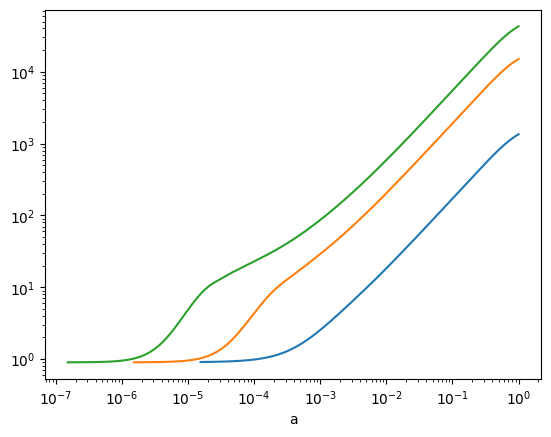

In [16]:
bg = uni1.get_background()
pb = uni1.get_perturbations()["scalar"][0]
plt.loglog(pb["a"],-pb['delta_cdm'])#,label="k=1e-3")
pb1 = uni1.get_perturbations()["scalar"][1]
plt.loglog(pb1["a"],-pb1['delta_cdm'],label="k=1")

pb2 = uni1.get_perturbations()["scalar"][2]
plt.loglog(pb2["a"],-pb2['delta_cdm'],label="k=1")
#plt.legend()
plt.xlabel("a")

Samme k-værdi men forskellige partikler

[0.01, 0.1, 1, 10]


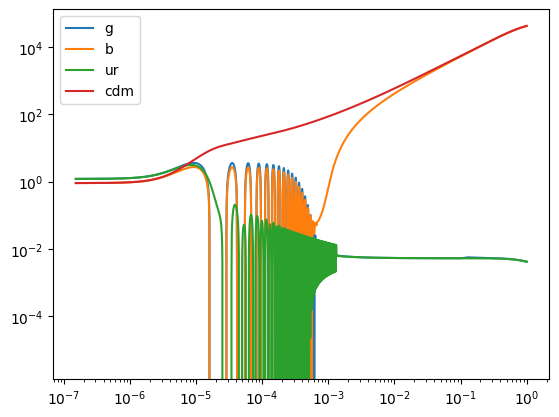

In [12]:
kvec = [1e-2,1e-1,1,10]#np.logspace(-6,np.log10(2.7),10)
print(kvec)
uni1 = Class() 
# "H0":67.7
h = 0.6704
dict_uni1 = {"gauge":"newtonian",
          "h":h,
         "Omega_b":0.07,"Omega_cdm":0.252, 
          'k_output_values':str(kvec).strip('[]'),
          "z_pk":'1000.0, 0.0',
          'output':'tCl, dTk, vTk'}

#alt_dict = {"gauge":"sync","h":h,"Omega_b":0.07,"Omega_cdm":0.252, 'k_output_values':str(kvec).strip('[]'), "z_pk":'1000.0, 0.0','output':'tCl, dTk, vTk'}
uni1.set(dict_uni1)
uni1.compute()
bg = uni1.get_background()
da = 3
pb = uni1.get_perturbations()["scalar"]
z = 0
pb0 = pb[2] # varrier dette tal for at få forskellige perturbationer ud.
tau = pb0['tau [Mpc]']
a = pb0["a"]
value_list = ["g","b","ur","cdm"]

for species in value_list:
    plt.loglog(a,-pb0["delta_"+species],label=species)
plt.legend()
plt.show()